__Name:__ Joaquin Quintana

In [1]:
import numpy as np
import numpy.linalg as npl #linear algebra package: https://numpy.org/doc/stable/reference/routines.linalg.html
import math
import itertools
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.integrate import odeint #https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

# 9.3 Epidemic Dynamics

**Simple SIR Model - Activity ONE**

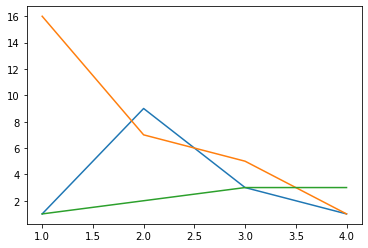

In [2]:
#Use Pseudocode from Calculus in Context, Chapter 2 page 69 to plot the 3 functions S, I and R. Use a (.00001)and b (14) as varibles instead of numbers
#Use a fixed plot window with y as the total height and fix the number of days you want to explore.
#Once it is working, add a new rate equation for Deaths by splitting up the "Recovered" 2 equations - for example 10 percent pass to death and 90 percent pass to recovered.
#Please comment your code.

#CODE HERE

#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 9, 3, 1])

plt.plot([1, 2, 3, 4], [16, 7, 5, 1])

plt.plot([1,2, 3, 4], [1, 2, 3, 3])


#### Here is the model in the book calc 1 book 

In [3]:
#Use Pseudocode from Calculus in Context, Chapter 2 page 69 to plot the 3 functions S, I and R. Use a (.00001)and b (14) as varibles instead of numbers
#Use a fixed plot window with y as the total height and fix the number of days you want to explore.
#Once it is working, add a new rate equation for Deaths by splitting up the "Recovered" 2 equations - for example 10 percent pass to death and 90 percent pass to recovered.
#Please comment your code.


#CODE HERE

def SIRmodel(t_initial,t_final,S,I,R,a,b,numberOfSteps):
    #intialize values that we are starting with and append this to list to ensure it is not left out
    s=[]
    r=[]
    i=[]
    x=[]
    x.append(t_initial)
    s.append(S)
    i.append(I)
    r.append(R)
    delta_t = (t_final-t_initial)/numberOfSteps
    t = t_initial
    
    #some for looping
    for _ in itertools.repeat(None, numberOfSteps):
        S_prime = -a*S*I
        I_prime = a*S*I - (I/b)
        R_prime = I/b

        delta_S = S_prime * delta_t 
        delta_I = I_prime * delta_t
        delta_R = R_prime * delta_t
       
        #get coordinates and plot line or accumualte data and plot at end 
        t = t + delta_t
        S = S + delta_S
        I = I + delta_I
        R = R + delta_R 
        #append data to plot at the end 
        x.append(t)
        s.append(S)
        i.append(I)
        r.append(R)

    plt.plot(x,s,label = "S")
    plt.plot(x,i,label = "I")
    plt.plot(x,r,label = "R")
    plt.title("Number of days %s and Transmission Coeffiecient, a = %s" % (b,a))
    plt.xlabel('time days'); plt.ylabel('People');plt.legend()
    
    return (x,s,i,r) #return x and SIR results

#### Run SIR model using parameter in book 

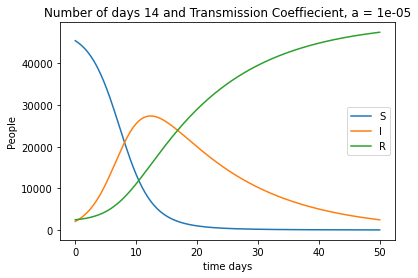

In [4]:
t_initial,t_final= 0,50 #days
S,I,R  = 45400,2100,2500 #intial values 
a,b = 0.00001,14 #a transmission coefficent and b the number of days needed to recover
numberOfSteps  = 300
k = SIRmodel(t_initial,t_final,S,I,R,a,b,numberOfSteps)


#### **Question 1:** Test your model with a = .00001 and b = 10 over 50 days and check with the given textbook. Show the output. Provide simple context for this model with comments or text.


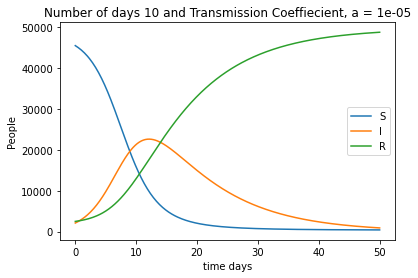

In [5]:
t_initial,t_final,S,I,R = 0,50,45400,2100,2500
a,b = 0.00001,10 #change b to 10. I don't expect much change from 14 as this is 1/b and is a small change results from 14 to 10
numberOfSteps  = 300

k=SIRmodel(t_initial,t_final,S,I,R,a,b,numberOfSteps)  

This model is convenient to look at as we can clearly see that as people become infected they recover ~ b days after the infection occurs. Therefore it makes sense that infections being an intermediate step between susceptible and recovery results in a bell curve with the peak of the curve being where the susceptibility and recovery curve cross. Finally, it is clear that the three plots play into each other affect one another. 

#### **Question 2:** Using your SIRPLOT code above, explore what happens when you change the length of time a disease takes to recover (which may happen with a new medicine for example). Provide examples from your model in code blocks and context and explanation in textblocks.



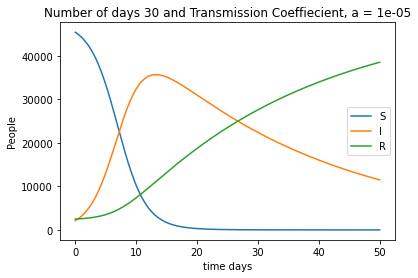

In [6]:
t_initial,t_final,S,I,R = 0,50,45400,2100,2500 #
a,b = 0.00001,30 #set number of days b needed to recover to 30. Maybe a new variant that takes longer to recover from 
numberOfSteps  = 300

k = SIRmodel(t_initial,t_final,S,I,R,a,b,numberOfSteps) 

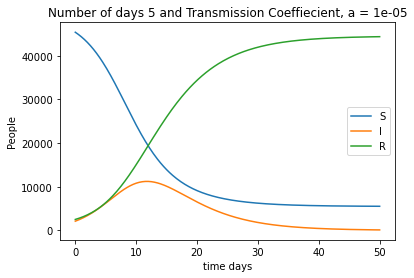

In [7]:
t_initial,t_final,S,I,R = 0,50,45400,2100,2500 #
a,b = 0.00001,5 #set number of days b needed to recover to 30. Maybe a new variant that takes longer to recover from 
numberOfSteps  = 300

k = SIRmodel(t_initial,t_final,S,I,R,a,b,numberOfSteps) 

In the first plot I increased the recovery time which resulted in the recovery curve being right skewed (maybe this a new variant which takes longer to recover from). This implies the infection stage takes longer and therefore delays or retards the time which people inter the recovery stage. The suseptiable population also dissappears quickly.  

In the second plot I reduced the recovery time and this resulted in less dramitic plots with a lower max peak for infections, higher basal level for suspetiable population and people enter recovery at an earlier time point than they would if the model used a longer recovery time. 

#### **Question 3:** Using your SIRPLOT code above, explore what happens to the course of a disease when you change the transmission coeffient $a$ (which happens if people self-isolate for example). Provide examples from your model in code blocks and context and explanation in textblocks.

__Self isolation implies transmission or exposure is lower and is controlled by a.__ Lower transmission by half here. 

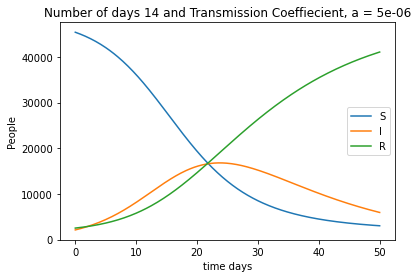

In [8]:
t_initial,t_final,S,I,R = 0,50,45400,2100,2500
a,b = 0.00001/2,14 #CHANGE TRANSMISSION RATE FROM 0.00001 TO 0.000005. This is lower exposure by 1/2
numberOfSteps  = 300
#SIRmodel(t_initial,t_final,S,I,R,a,b,numberOfSteps)

k = SIRmodel(t_initial,t_final,S,I,R,a,b,numberOfSteps)

Let's say the whole city celebrated a party and $a$, the transmission rate, doubles

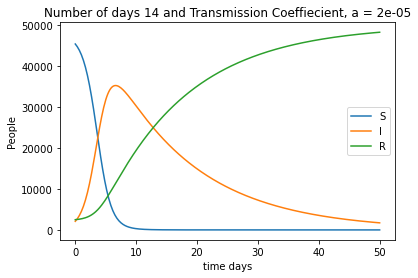

In [9]:
a1,b1 = 0.00001*2,14 #CHANGE TRANSMISSION RATE FROM 0.00001 TO 0.00002. This is increase exposure by 2
k = SIRmodel(t_initial,t_final,S,I,R,a1,b1,numberOfSteps)

We see that lowering the transmision by half results in the infection spreading through the populations at a slower rate. This implies the peak infection rate happens at a later time than it does when the transmission rate is higher. Looking at the second plot, where the transmission rate is doubled, we see the infections runs wild through the population early on and dies of faster. This results in a large intial peak infection, a dive in the suseptiable population and a large number of people starting recovering not long after the peak infection occurs.   

**SIR with Differential Equations**

#### **Question 4:** Look at the following implementation of SIR (adapted from the https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/) using differential equations. 

How is it the same and how is it different to SIRPLOT? Answer here with code and text examples.

* There is a code block out of place which makes this confusing. This the matrix examples appear here before the scipy. Resolved during office hours. 

The two models essentially do the same thing except the model above computes the rate of change in an iterative fashion while the one below use the sci python package to compute the derivatives of S,I and R with respect to time.

Here is the SIR model using Sci Pyhton and differential equations:

In [10]:
#def a function using SciPython for SIR model
def ScipySIRmodel(N,t,S,I,R,a,b):

    # The SIR model differential equations.
    def deriv(y, t, N, a, b):
        S, I, R = y
        dSdt = -a * S * I 
        dIdt = a * S * I - b * I
        dRdt = b * I
        return dSdt, dIdt, dRdt

    # Initial conditions vector
    y0 = S, I, R
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, a, b))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number')
    #ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.title("Number of days 30 and Transmission Coeffiecient, a = %s" % (a))
    plt.show()
    

#### **Question 5:**
Can you use this model to explore the Questions 2 and 3 above. Answer here.

Yes. Here is an example using 

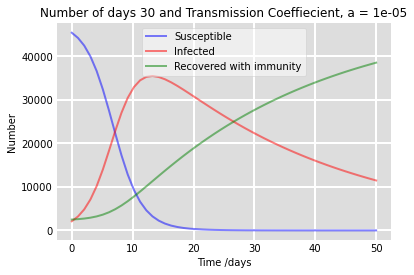

In [11]:
# Total population, N.
N = 50000
# Initial number of infected and recovered individuals, I0 and R0.
I, R = 2100, 2500
# Everyone else, S0, is susceptible to infection initially.
S = N - I - R
# Contact rate, a, and mean recovery rate, b, (in 1/days).
a, b = 0.00001, 1./30 
# A grid of time points (in days)
t = np.linspace(0, 50, 50)

#for Q2 we let extend recovery to 30 days 
ScipySIRmodel(N,t,S,I,R,a,b)

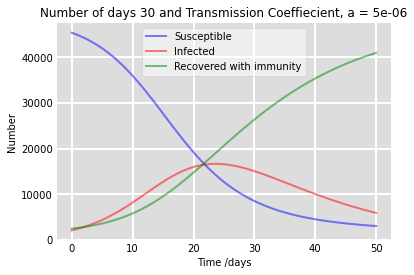

In [12]:
#Q3
#b is constant with a 14 day recovery but vary a
a,b = 0.00001/2,1/14 #CHANGE TRANSMISSION RATE FROM 0.00001 TO 0.000005. This is lower exposure by 1/2
ScipySIRmodel(N,t,S,I,R,a,b)

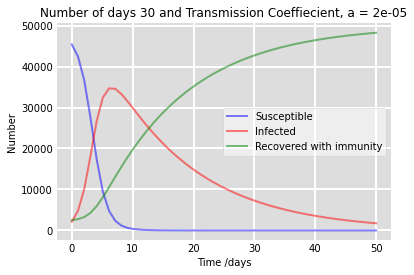

In [13]:
#Q3 continued 
a1,b1 = 0.00001*2,1/14 #CHANGE TRANSMISSION RATE FROM 0.00001 TO 0.00002. This is increase exposure by 2

ScipySIRmodel(N,t,S,I,R,a1,b1)

**SIR with Matrices**

**Question 6:**
How is this implementation the same and different than SIRPLOT and the differential equation SIRmodel? Can you explore changes in the transmission coefficent and recovery rate the same way?  Answer here.

Exploring the matrix SIR is much more cumbersome than the two above. Above we can randomly or iteratively change the values to see who the output changes. With the matrix a simple change in one the parameters could result in an output that was irrlevant to the problem being addressed. Therefore the matrix model cannot be used to explore recovery rate or tranmission rate in the same fashion as we did with the models shown above.  

**Question 7:**
What are the advantages and disadvantages of this matrix model?  Answer here.

__Advantage:__ 

* The computation is compact and simple as we only take the inner product a few times and plot the result. The compactness makes the matrix model a convenient way to compute the result if you know the parameters ahead of time and know they are fesiable. 

__Disadvantage:__
If the parameters are not feasiable it could be difficult to track down why they are not feasiable in the matrix model. However, it is much easier to track down why something is not working using sci python model or the book model.  


(4, 50)


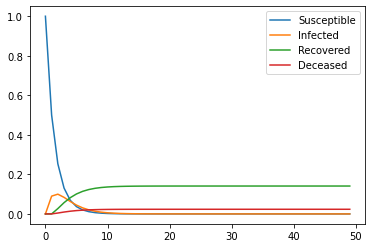

In [14]:
T  = 50 #number of days
a= .5         # % new infection each day
aS= 1 - a      # % remain suseptible
rnI= .04       # recover no immunity
rI= .3         # recover with immunity
rD= .05        # die from disease


A = np.matrix([[aS,rnI,0,0],[rnI+rD,(1-(rnI +rI + rD)) ,0,0],[0,rI,1,0],[0,rD,0,1]]) #dynamics matrix
x1 = np.array([1,0,0,0]) #initial state: everyone healthy
stateTraj = np.hstack([np.vstack(x1),np.zeros((4,T-1))]) #initialize trajectory with 0s
print(stateTraj.shape)
for t in range(T-1):
    #computing the inner product of A with each column of stateTraj
    stateTraj[:,t+1] = np.matmul(A,stateTraj[:,t])
    
for i in range(len(stateTraj)):
    #print(stateTraj[i])
    plt.plot(range(T),stateTraj[i]);

plt.legend(["Susceptible","Infected","Recovered","Deceased"]);


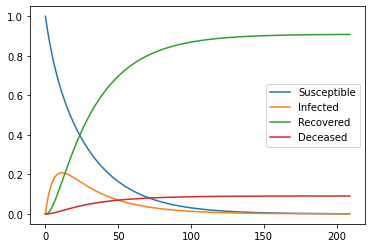

In [15]:
#KEEP THIS VERISON FOR REFERENCE

T  = 210 #number of days
a= .05          # % new infection each day
aS= 1 - a      # % remain suseptible
rnI= .04       # recover no immunity
rI= .1         # recover with immunity
rD= .01        # die from disease


A = np.matrix([[aS,rnI,0,0],[rnI+rD,(1-(rnI +rI + rD)) ,0,0],[0,rI,1,0],[0,rD,0,1]]) #dynamics matrix
x1 = np.array([1,0,0,0]) #initial state: everyone healthy
stateTraj = np.hstack([np.vstack(x1),np.zeros((4,T-1))]) #initialize trajectory with 0s
for t in range(T-1):
    #print(np.matmul(A,stateTraj[:,t]))
    stateTraj[:,t+1] = np.matmul(A,stateTraj[:,t])

for i in range(len(stateTraj)):
    plt.plot(range(T),stateTraj[i])

plt.legend(["Susceptible","Infected","Recovered","Deceased"]);

**Question 8:**
Calculus in Context, Chapter 4, explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Lotka-Voerra Model from page 193 number 7. Answer a - f. 
!!!! for c use c = .0024 not .00004.

In [16]:
# Hare and Lynx model 
import numpy as np
import itertools
import matplotlib.pyplot as plt 

def HareLynxModel(t_initial,t_final,H,L,a,b,c,d,numberOfSteps):
    h=[]
    l=[]
    x=[]

    x.append(t_initial)
    h.append(H)
    l.append(L)

    delta_t = (t_final-t_initial)/numberOfSteps
    t = t_initial

    #some for looping
    for _ in itertools.repeat(None, numberOfSteps):
        H_prime = a*H - b*H*L
        L_prime = c*H*L - d*L
        delta_H = H_prime * delta_t 
        delta_L = L_prime * delta_t

       
    #get coordinates and plot line or accumualte data and plot at end 
        t = t + delta_t
        H = H + delta_H
        L = L + delta_L
         
        x.append(t)
        h.append(H)
        l.append(L)
        
    
    #scale the amplitude of the lynx plot by 60 
    #l = [x * 60 for x in l]

    fig, ax = plt.subplots()
    #use twinx()
    ax2 = ax.twinx()
    ax.plot(x,h,label = "H",color="b")    
    
    ax2.plot(x,l,"--",label = "L", color = "k")
    
    # giving labels to the axises
    ax.set_xlabel('Months')
    ax.set_ylabel('hares')

    # secondary y-axis label
    ax2.set_ylabel('lynx')
    
    ax.legend(loc = "upper left")
    ax2.legend()
    plt.title("Hare Lynx model L0 = %s" % (l[0]) )
    plt.tight_layout()
    plt.grid()
    plt.show()

    return (x,h,l) #return x, hares and lynx

a) This is basic model as it assumes that the hares experince a constant growth per capita if there are no lynx. If this were the case we would have

* hares growing at a constant rate overtime t. 

$H^{'} = aH$ 

This case is not likely as the hare may have enironmental obstacles or even display a sigmodial growth curve if there are no predators. In cases like this the growth of a species is only limited by some capacity limit like food supply.   

The model also assumes a,b,c and d are postive, which allows us to use the set of equations to model the closed systems between the hare and the lynx. Again this is a basic model as it is a closed system and ignores many real world factors such as disease. Having the closed system is nice though as it allows for us to get a good approximation of what is happening given a few parameters. 

b) This is simply dimensional analysis. Lets write the given information in a form where we can look at each parameters units. 

$a = \frac{haresPerMonth}{hare}$

$b = \frac{haresPerMonth}{hare*lynx}$

$c = \frac{lynxPerMonth}{hare*lynx}$

$d = \frac{lynPerMonth}{lynx}$

$H(t)$ = hares at time $t$

$L(t)$ = lynxs at time $t$

Now we are given the system of equations: 

$H^{'} = aH - b HL$ 

$H^{'} = (\frac{haresPerMonth}{hare}){hare} - ( \frac{haresPerMonth}{hare*lynx})(hare)(lynx) = haresPerMonth$

We see that we get the rate of change for H with respect to t in the presence of a predator. This is similiar for $L^{'}$ except are looking the rate of change with respect to time and the abundance or lack of prey. 

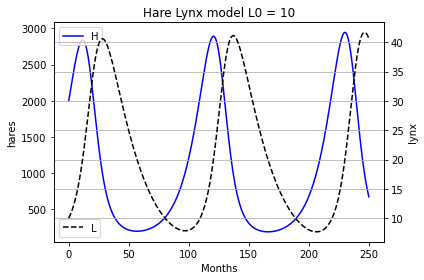

In [17]:
#c using H0 = 2000 and L0 = 10. pg 194 calc1 book

x,h,l = HareLynxModel(0,250,2000,10,0.1,0.005,0.00004,0.04,2500)

### D

Model with L0 = 20: 


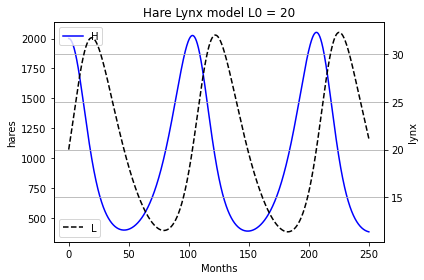

Model with L0 = 50: 


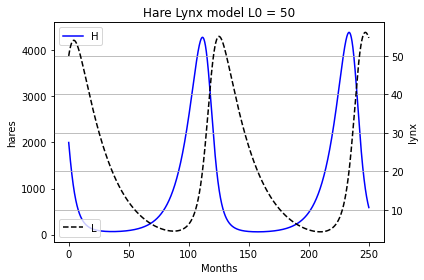

In [18]:
# 8d
#What happens if you keep the same initial hare population of 2000, but use different initial lynx populations? Try L(0) = 20 and L(0) = 50. (In each case, use a step size of .1 month.)
for i in [20,50]:
    print('Model with L0 = %s: ' % (i))
    x,h,l = HareLynxModel(0,250,2000,i,0.1,0.005,0.00004,0.04,2500) 

# e

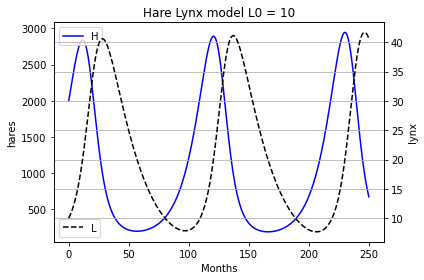

In [19]:
#using H0 = 2000 and L0 = 10. pg 194 calc1 book
x,h,l = HareLynxModel(0,250,2000,10,0.1,0.005,0.00004,0.04,2500)

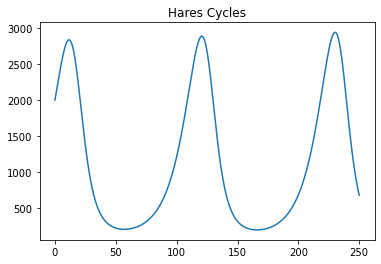

Period of hares population:  109.0


In [20]:
#compute the index for the max peaks for the hare data
peaks, _ = find_peaks(h, height=0)
plt.plot(x,h)
plt.title("Hares Cycles")
plt.show()
HareCycle = peaks[1] - peaks[0]
print("Period of hares population: ",HareCycle/10)

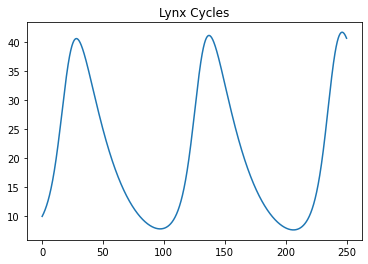

Period of hares population:  108.9


In [21]:
#compute the index for the max peaks for the lynx data
peaks, _ = find_peaks(l, height=0)
plt.plot(x,l)
plt.title("Lynx Cycles")
plt.show()
LynxCycle = peaks[1] - peaks[0]
print("Period of hares population: ",LynxCycle/10)

__How much do the hare and lynx cycles differ?__

In [22]:
CyclesDifferBy = ( (HareCycle-LynxCycle)/(HareCycle+LynxCycle)/2 )*100
print("The hare and the lynx's cycle differs by %s percent and therefore they have pretty much the same cycle" % ( round(CyclesDifferBy,2) ) )

The hare and the lynx's cycle differs by 0.02 percent and therefore they have pretty much the same cycle


# f

Model with L0 = 10: 


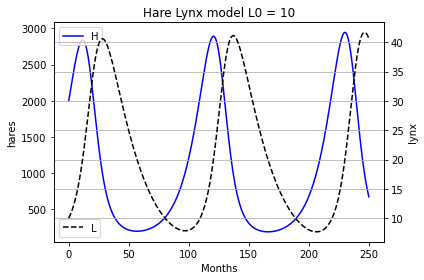

Results of model above: 
LynxCycle: 108.9  
HareCycle: 109.0  

Model with L0 = 20: 


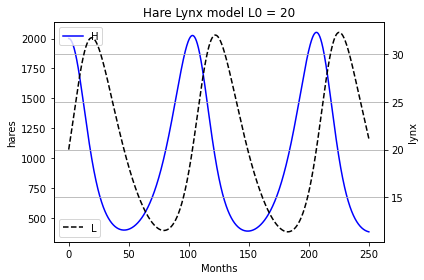

Results of model above: 
LynxCycle: 103.0  
HareCycle: 103.20000000000002  

Model with L0 = 50: 


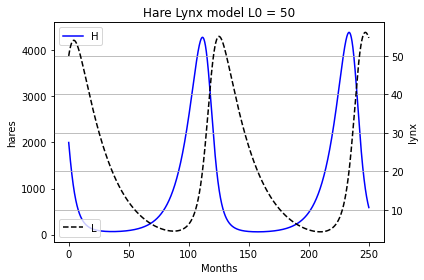

Results of model above: 
LynxCycle: 120.9  
HareCycle: 122.1  

Model with L0 = 55: 


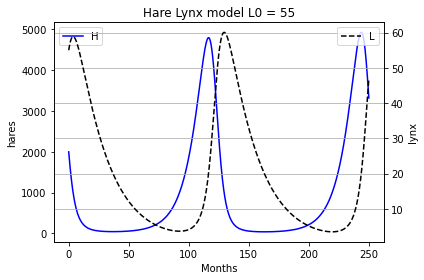

Results of model above: 
LynxCycle: 125.8  
HareCycle: 127.19999999999999  



In [23]:
# 8f
#What happens if you keep the same initial hare population of 2000, but use different initial lynx populations? Try L(0) = 20 and L(0) = 50. (In each case, use a step size of .1 month.)
for i in [10,20,50,55]:   
    print('Model with L0 = %s: ' % (i))
    x,h,l = HareLynxModel(0,250,2000,i,0.1,0.005,0.00004,0.04,2500) 
    #get peaks     
    peaksLynx, _ = find_peaks(l, height=0)
    peaksHare, _ = find_peaks(h, height=0)
    #compute one cycle length 
    HareCycle = peaksHare[1]/10 - peaksHare[0]/10
    LynxCycle = peaksLynx[1]/10 - peaksLynx[0]/10
    #results of cycles for varying number of lynx
    print('Results of model above: \nLynxCycle: %s  \nHareCycle: %s ' % (LynxCycle,HareCycle),"\n")

The cycles are perodic up until ~ L0 = 55 and then the cycles become to large to fit more than one full cycle on the plot given the time scale. Assume they remain perodic but with much larger cycles up until the population can't recover. Overall it appears the cycle length gets longer when the intial number of lynx is increased.  

**Question 9:**
Chapter 4 explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Fermentation Model from page 195 numbers 8/9/10/11. You do not need to answer the questions, just implement the model.


In [24]:
def YeastModel(t_initial,t_final,Y,k,b,numberOfSteps):
    y=[]
    x=[]

    x.append(t_initial)
    y.append(Y)

    delta_t = (t_final-t_initial)/numberOfSteps
    t = t_initial

    #some for looping
    for _ in itertools.repeat(None, numberOfSteps):
        Y_prime = k*Y*( 1-(Y/b) )
        
        #L_prime = c*H*L - d*L
        delta_H = Y_prime * delta_t 
       #delta_L = L_prime * delta_t

       
    #get coordinates and plot line or accumualte data and plot at end 
        t = t + delta_t
        Y = Y + delta_H
        #L = L + delta_L
         
        x.append(t)
        y.append(round(Y,2))
       # l.append(L)
        
    half = b/2
    pointOneOfb = b-(b*0.01) 
    ClosestY = lambda num,collection:min(collection,key=lambda y:abs(y-num))
    plt.plot(x,y,"--",label = "L", color = "k") 
    plt.scatter(x[y.index(ClosestY(pointOneOfb,y) )],ClosestY(pointOneOfb,y))#plot dot when capcaity is at 1%
    
    plt.scatter(x[y.index(ClosestY(half,y))],ClosestY(half,y))#place
    plt.show()
    return (x,y) #list(itertools.chain(*x)),list(itertools.chain(*y))

### parts a and b from calc 1 book 

Orange dot shows where 50% of the capacity has been reached and the blue dot show when capacity is at 99.0%. 

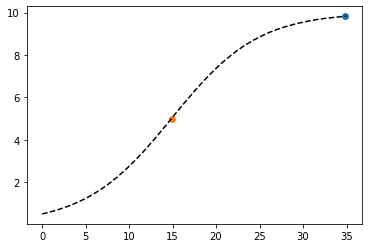

In [25]:
#parts a and b from calc 1 book 
Y0 = 0.5 #begin with 0.5 lbs of yeast
b=10 #b is the carrying capcity and has units lbs
k = 0.2 #k is the growth rate of yeast and has units lbsPerHr/lbs
#run model
x,y = YeastModel(0,35,Y0,k,b,200)

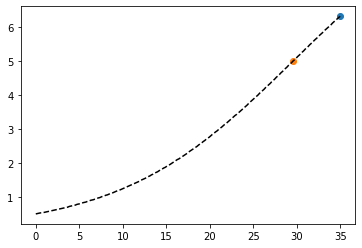

In [26]:
#half k see what happend to the capacatiy values 
k = k/2 
x,y = YeastModel(0,35,Y0,k,b,200)


**Question 10:** 

Create your own species (or other) SIR type model. 

Provide code and aa sample output.

Here I will model the axis deer population on the island of Molokai, Hawaii. The 7 axis, $A0 = 7$ deer were introduced to the island sometime around 1860. The axis population was surveyed in 2021 and was found to be approximatly 70,000 in number. Since the island is experinceing land erosion as a result of the axis population I will set the carrying capacity of Molokai to be $b = 70000$. The axis deer have no known predators except humans but we will ignore this and only focus on the axis deer without any predators as they have clearly grown to be overpopulated even with hunting. Finally, the axis deer's growth rate has fluctuated over the years between ~ 13% and 30%. For our purposes we will use a constant growth rate of 15%. With this information we see this model is similar to the yeast model and the deer are only limited by the islands capacity to sustain them without erosion. Here is and example in python...

In [27]:
import numpy as np
import itertools
import matplotlib.pyplot as plt 

def AxisModel(t_initial,t_final,Y,k,b,numberOfSteps):
    x=[]
    y=[]

    x.append(t_initial)
    y.append(Y)

    delta_t = (t_final-t_initial)/numberOfSteps
    t = t_initial

    #some for looping
    for _ in itertools.repeat(None, numberOfSteps):
        A_prime = k*Y*( 1-(Y/b) )
        
        #L_prime = c*H*L - d*L
        delta_A = A_prime * delta_t 
       #delta_L = L_prime * delta_t

       
    #get coordinates and plot line or accumualte data and plot at end 
        t = t + delta_t
        Y = Y + delta_A
        #L = L + delta_L
         
        x.append(t)
        y.append(round(Y,2))
       # l.append(L)
        
    half = b/2
    pointOneOfb = b-(b*0.01) 
    ClosestY = lambda num,collection:min(collection,key=lambda y:abs(y-num))
    plt.plot(x,y,"--",label = "L", color = "k") 
    plt.scatter(x[y.index(ClosestY(pointOneOfb,y) )],ClosestY(pointOneOfb,y))#plot dot when capcaity is at 1%
    
    plt.scatter(x[y.index(ClosestY(half,y))],ClosestY(half,y))#place
    plt.title("Axis Deer Pop. Molokai")
    plt.ylabel("Axis Deer Pop. Molokai")
    plt.xlabel("Years Starting In 1860-2021")
    plt.show()
    return (x,y) #list(itertools.chain(*x)),list(itertools.chain(*y))

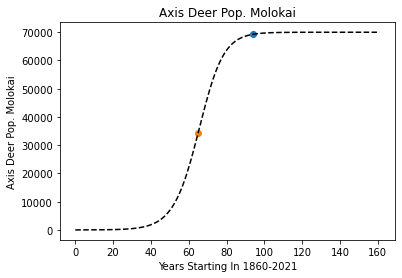

In [28]:
Y0 = 7 #begin with only 7 ax
b= 70000 #b is the carrying capcity which I will set as today pooluation of Axis deer on the island of Molokai
k = 0.15 #k is the growth rate and are said to bread at ~15% per year without predators

x,y = AxisModel(0,161,Y0,k,b,161) # time scale is 161 years or since introduction in 1860 to 2021

Source used to gather basic information on Axis deer on Molokai: 
    
* https://modernfarmer.com/2021/05/the-struggle-to-contain-and-eat-the-invasive-deer-taking-over-hawaii/
* https://muse.jhu.edu/article/837988#:~:text=In%20VORTEX%20simulations%2C%20we%20evaluated,over%20a%2010%2Dyear%20period.
* https://bioone.org/journals/pacific-science/volume-75/issue-4/75.4.8/Modeling-Scenarios-for-the-Management-of-Axis-Deer-in-Hawaii1/10.2984/75.4.8.full#:~:text=Axis%20deer%20populations%20are%20female,30%25%20(Anderson%202003).

**Finally:**
    
What are some thoughts about modeling from this project? 
* The project is fun but does take longer than the other assignements. Some of the instructions were not clear and that made it hard to ensure I knew what you were looking for. The Calculus book is referenced a lot for this assignment but the places to look are scattered throughout a few chapters and that can be hard to manage at times. 

Which model was the simpliest?
* The yeast model was simpiliest for me as it is a pretty staight forward plot. 

Which expressed the underlying ideas best?
* The lynx and hare model is a fine medium between the SIR model and the yeast model. This is, the hare and lynx model has the two species incorporated and we see how they effect one another. This is nice as it is less complicated than the SIR model but shows the interaction between parameters which the yeast model lacks.  

Which was good for a "snapshot" of the ideas?
* The lynx and hare model 

As we use more packages for mathematical modelling do we sometimes loss track of the ideas?
* I think we do. We can do a lot more really quickly with the packages but sometime we forget small details like why the number of steps in the model is important or these details can easily get looked over.